<a href="https://colab.research.google.com/github/kharlescim/ERT_Project/blob/main/USDM_Prediction_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code Inspired by   "Computing and plotting storm total rainfall for Hurricane Harvey (2017)" by Jonathan Case

In [3]:
!pip install cartopy

In [4]:
import xarray as xr
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import datetime as dt
import datetime
from datetime import timedelta

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [5]:
predictions = xr.open_dataset("USDM_predictions.nc")

In [7]:
ds_view = predictions['USDM'].sel(time='2017-08-29')

In [8]:
lon2d, lat2d = np.meshgrid(ds_view.lon, ds_view.lat)

In [9]:
# NOAA/NWS StageIV/AHPS RGB colorbar colors used at https://water.noaa.gov
under = '#E1E1E1' # light gray
c1 = '#60D0F8'  # light blue
c2 = '#6C9BCC'  # mid blue
c3 = '#494DA5'  # dark blue
c4 = '#5EFB6C'  # light green
c5 = '#52B05B'  # mid green
c6 = '#4A8352'  # dark green
c7 = '#FAFB6E'  # yellow
c8 = '#FDDF8F'  # gold
c9 = '#F8A95E'  # orange
c10 = '#F84553' # red
c11 = '#B9424D' # dark red
c12 = '#944147' # maroon
c13 = '#F840F5' # magenta
c14 = '#9570E0' # purple
over = '#E1E1E1' # light gray

In [10]:
from matplotlib.colors import ListedColormap

colors = ["#FFFFB2", "#FECC5C", "#FD8D3C", "#F03B20", "#BD0026"]  # D0‒D4
cmap   = ListedColormap(colors, name="usdm")

In [11]:
# Apply geographical extent of plot (lower-left/upper-right lons and lats).
# Set up plotting features.
lonll = -125
lonur = -66
latll = 24
latur = 50
geo = [lonll, lonur, latll, latur]
map_proj = ccrs.PlateCarree()
mapscale ='50m'
coastlines = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale=mapscale,
    edgecolor='black',
    facecolor='none')
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale=mapscale,
    edgecolor='black',
    facecolor='none')
states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces',
    scale=mapscale,
    edgecolor='black',
    facecolor='none')

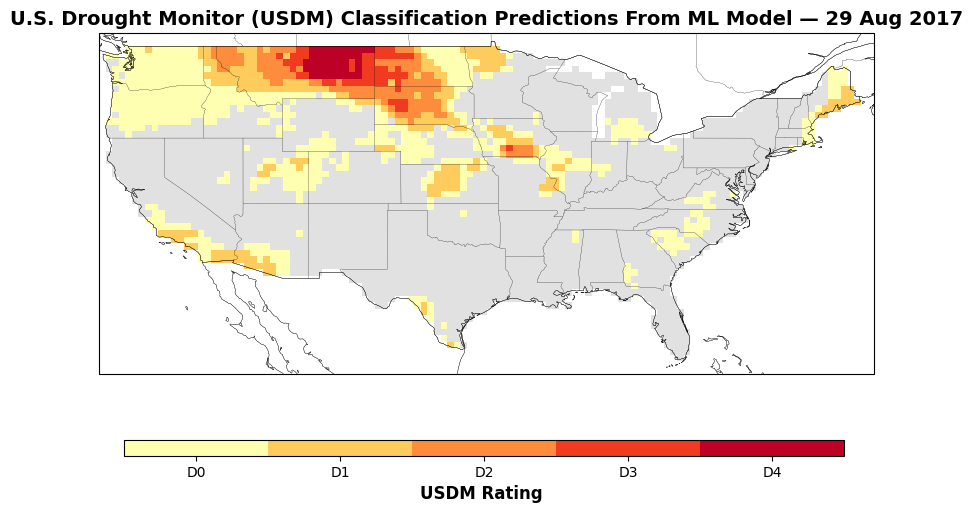

In [13]:
# make plot of final total precip from event
fig, ax = plt.subplots(1, 1, figsize=(10, 8),
                       subplot_kw={'projection': map_proj})
ax.set_extent(geo, crs=map_proj)
# Draw Lats, Lons, Coastlines, Countries, States, and Lakes
# using Natural Earth (public domain http://naturalearthdata.com)
ax.add_feature(coastlines, linewidth=0.2,)
ax.add_feature(countries, linewidth=0.2,)
ax.add_feature(states, linewidth=0.1,)
cs = ax.pcolormesh(lon2d, lat2d, ds_view,             # <- your data
                   cmap=cmap,
                   vmin=-0.5, vmax=4.5,          # centers color bins on ints
                   transform=ccrs.PlateCarree(),
                   shading='auto')
cs.cmap.set_under(under)
cs.cmap.set_over(over)
# [left, bottom, width, height]
cbar_ax = fig.add_axes([0.15, 0.18, 0.72, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, ticks=[0, 1, 2, 3, 4],
                    orientation='horizontal', extendfrac=0.05)
cbar.ax.set_xticklabels(["D0", "D1", "D2", "D3", "D4"])
cbar.set_label('USDM Rating ', size=12, weight='bold')
ax.set_title("U.S. Drought Monitor (USDM) Classification Predictions From ML Model — 29 Aug 2017", fontsize=14, fontweight='bold')
plt.show()